In [1]:
import os
print(os.getcwd())


/Users/saatvikshrivastava/Downloads/leaf


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


2023-12-11 13:50:09.095618: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
import pathlib


In [119]:
dataset_path = "/Users/saatvikshrivastava/Downloads/leaf/disease/tea sickness dataset"
dataset_dir = pathlib.Path(dataset_path)

In [120]:
class_names = []
for x in os.walk(dataset_path):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    if len(sub_dir_list) > 4 and sub_dir_list[-1] != 'tea sickness dataset':
        x_class = sub_dir_list[-1]
        class_names.append(x_class)

print(class_names)


['white spot', 'Anthracnose', 'healthy', 'gray light', 'bird eye spot', 'algal leaf', 'brown blight', 'red leaf spot']


In [121]:
for class_i in class_names:
    image_count = len(list(dataset_dir.glob(f'{class_i}/*.jpg')))
    print(f"Images in class {class_i}:",image_count)

Images in class white spot: 142
Images in class Anthracnose: 100
Images in class healthy: 74
Images in class gray light: 100
Images in class bird eye spot: 100
Images in class algal leaf: 113
Images in class brown blight: 113
Images in class red leaf spot: 143


In [122]:
train_batch = 128
val_batch = 128
img_height = 224
img_width = 224
IMG_SIZE = (img_height, img_width)
val_split = 0.2

In [123]:
train_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,
                                                       validation_split=val_split,
                                                       subset="training",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=train_batch
                                                      )

Found 885 files belonging to 8 classes.
Using 708 files for training.


In [124]:
val_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,                                                            
                                                     validation_split=val_split,                                                            
                                                     subset="validation",                                                     
                                                     seed=123,                                                     
                                                     image_size=(img_height, img_width),                                                     
                                                     batch_size=val_batch                                                           
                                                    )

Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [125]:
class_names = train_ds.class_names
print(class_names)

num_classes=len(class_names)

['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


2023-12-11 22:42:44.583627: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:586: Filling up shuffle buffer (this may take a while): 254 of 1024
2023-12-11 22:42:54.723700: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:586: Filling up shuffle buffer (this may take a while): 502 of 1024
2023-12-11 22:43:03.431667: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


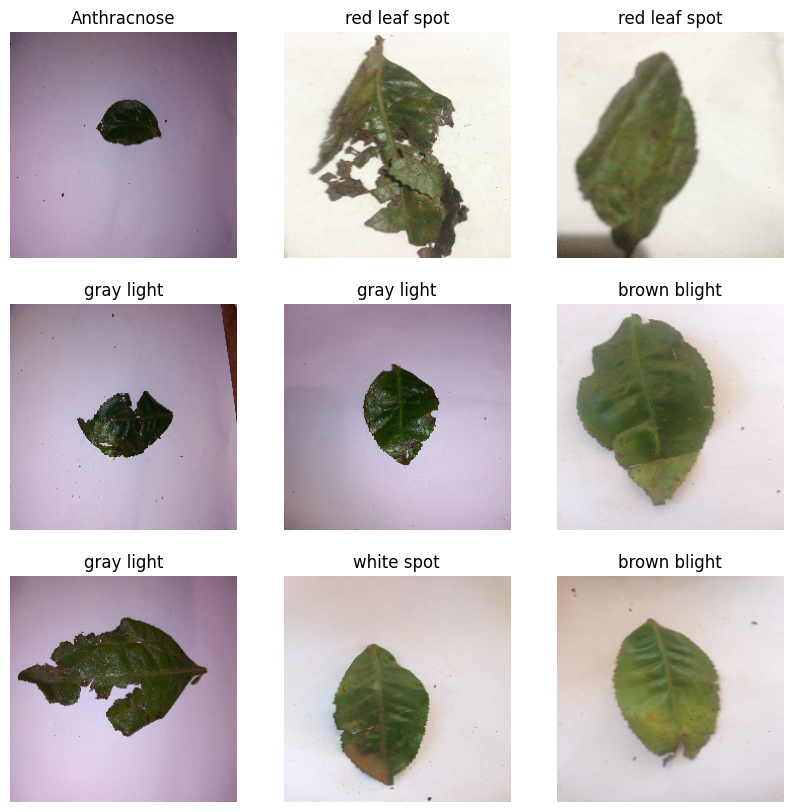

In [126]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [127]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [128]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import pathlib
## Data augmentation layers to increase data variation for training
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [129]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(num_classes)
])

In [130]:
base_learning_rate = 0.0005
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [131]:
epochs=32
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1
)

Epoch 1/32


2023-12-11 22:44:47.388682: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:586: Filling up shuffle buffer (this may take a while): 244 of 1024
2023-12-11 22:44:57.412634: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:586: Filling up shuffle buffer (this may take a while): 456 of 1024
2023-12-11 22:45:06.188952: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.
2023-12-11 22:45:06.774495: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


6/6 [==============================] - ETA: 0s - loss: 2.7143 - accuracy: 0.1257

2023-12-11 22:45:58.373380: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:593: Filling up shuffle buffer (this may take a while): 123 of 1024
2023-12-11 22:46:02.620499: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


6/6 [==============================] - 95s 10s/step - loss: 2.7143 - accuracy: 0.1257 - val_loss: 2.6534 - val_accuracy: 0.1412
Epoch 2/32
6/6 [==============================] - 33s 5s/step - loss: 2.6473 - accuracy: 0.1229 - val_loss: 2.8440 - val_accuracy: 0.1412
Epoch 3/32
6/6 [==============================] - 44s 7s/step - loss: 2.4717 - accuracy: 0.1610 - val_loss: 2.7626 - val_accuracy: 0.1412
Epoch 4/32
6/6 [==============================] - 42s 7s/step - loss: 2.3426 - accuracy: 0.1737 - val_loss: 2.5173 - val_accuracy: 0.1412
Epoch 5/32
6/6 [==============================] - 39s 7s/step - loss: 2.2979 - accuracy: 0.1540 - val_loss: 2.3718 - val_accuracy: 0.2147
Epoch 6/32
6/6 [==============================] - 38s 7s/step - loss: 2.1913 - accuracy: 0.2175 - val_loss: 2.1351 - val_accuracy: 0.2938
Epoch 7/32
6/6 [==============================] - 33s 5s/step - loss: 2.1238 - accuracy: 0.2048 - val_loss: 1.9680 - val_accuracy: 0.2881
Epoch 8/32
6/6 [============================

Predictions:
 [7 7 0 1 2 7 2 1 1 4 2 3 1 6 2 1 0 1 3 4 3 0 6 3 1 0 1 1 4 0 3 5 3 2 6 4 3
 1 4 4 7 7 6 4 0 2 6 1 1 1 6 2 3 4 4 7 7 1 5 0 6 2 0 4 1 6 4 6 7 5 3 7 3 2
 2 7 1 3 2 2 2 6 6 0 0 1 1 4 7 0 2 0 5 3 2 6 4 7 7 7 2 6 2 7 4 1 3 3 5 6 5
 5 7 6 1 3 2 7 7 0 3 2 7 2 0 1 3 4]
Labels:
 [3 7 2 7 0 7 2 1 1 4 0 7 7 6 0 1 2 3 3 4 3 0 6 3 7 4 1 1 0 4 7 5 3 0 6 4 3
 7 4 4 7 7 6 2 0 4 6 3 1 3 6 2 7 4 4 3 7 1 5 0 6 4 0 4 1 6 4 6 3 5 3 7 3 2
 2 7 1 3 2 0 4 6 6 0 0 1 1 4 7 0 0 4 5 3 2 6 4 7 7 3 2 6 0 7 4 1 3 3 5 6 5
 5 7 6 1 3 2 3 7 0 3 4 3 0 4 7 3 0]

              precision    recall  f1-score   support

           0       0.57      0.44      0.50        18
           1       0.62      1.00      0.76        13
           2       0.40      0.73      0.52        11
           3       0.82      0.61      0.70        23
           4       0.80      0.60      0.69        20
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        15
           7       0.

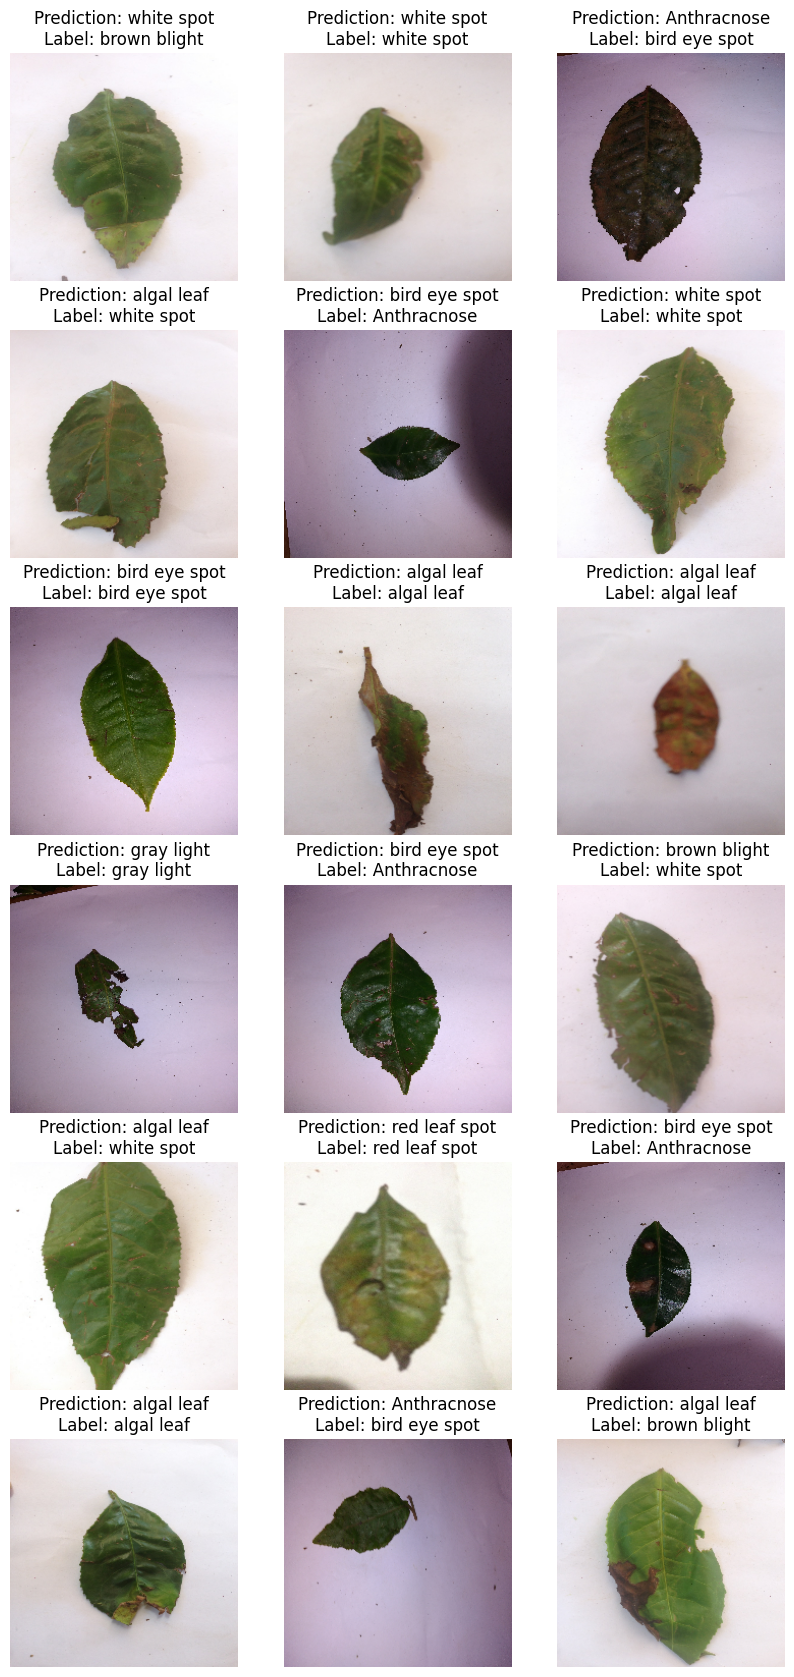

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL

# Retrieve a batch of images from the test set
image_batch, label_batch = val_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

class_predictions = []
for i in predictions:
    class_prediction = np.argmax(i)
    class_predictions.append(class_prediction)

class_predictions = np.array(class_predictions)
print('Predictions:\n', class_predictions)
print('Labels:\n', label_batch)
print()
print(classification_report(label_batch, class_predictions))

plt.figure(figsize=(10, 21))
for i in range(18):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title("Prediction: "+class_names[class_predictions[i]]+"\nLabel: "+class_names[label_batch[i]])
    plt.axis("off")

In [85]:
import pickle

# Assuming 'model' is your trained model
# Save the model to a file using pickle
model_filename = 'finalmodel.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

# Print a message indicating successful export
print(f"Model has been exported to {model_filename}")


Model has been exported to finalmodel.pkl


1/1 [==============================] - 0s 47ms/step
Raw Predictions: [[2.0712974071502686, -0.5237853527069092, 3.079423189163208, -0.6281331181526184, 2.689788818359375, -1.2874555587768555, -1.0757838487625122, -1.0564144849777222]]
Class: Anthracnose, Probability: 2.0713
Class: algal leaf, Probability: -0.5238
Class: bird eye spot, Probability: 3.0794
Class: brown blight, Probability: -0.6281
Class: gray light, Probability: 2.6898
Class: healthy, Probability: -1.2875
Class: red leaf spot, Probability: -1.0758
Class: white spot, Probability: -1.0564
Predicted Class: bird eye spot


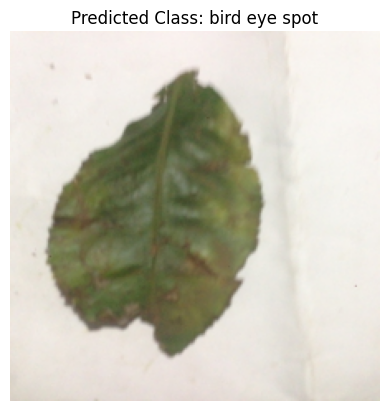

Class: Anthracnose, Probability: 1.9973
Class: algal leaf, Probability: -0.5212
Class: bird eye spot, Probability: 2.9953
Class: brown blight, Probability: -0.6537
Class: gray light, Probability: 2.6843
Class: healthy, Probability: -1.3044
Class: red leaf spot, Probability: -1.0277
Class: white spot, Probability: -1.0362


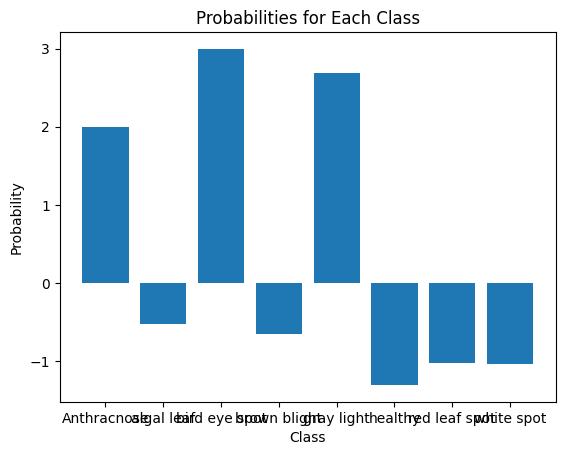

In [107]:
# Print the class names along with their corresponding probabilities
for class_name, probability in zip(class_names, predictions[0]):
    print(f"Class: {class_name}, Probability: {probability:.4f}")

# Plot the probabilities for all classes
plt.bar(class_names, predictions[0])
plt.title("Probabilities for Each Class")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()
